In [1192]:
data = {
    'RMS': root_mean_square,
    'standar_deviasi time': standar_deviasi,
    'mean time': rata2,
    'periode S1 S2': periodeS1S2,
    'periodeS2': periodeS2,
    'periodeS1': periodeS1,
    'Mean Power Frequency (MPF) ': mean_mpf,
    'Standard Deviation Frekuensi': std_devs
}

print(data)

{'RMS': 0.5901336280004441, 'standar_deviasi waktu': 0.39146834512152756, 'rata-rata waktu': 0.4416701017462824, 'periode S1 S2': 0.3014285714285715, 'periodeS2': 0.7333333333333333, 'periodeS1': 0.7513333333333335, 'Mean Power Frequency (MPF) ': 40.492546862877894, 'Standard Deviation Frekuensi': 58.24731727422608}


In [1193]:
from ann import model

#load weight from ann
model.load_weights('C:\\Users\\HP\\checkpoint1.weights.h5')

df = pd.DataFrame([data])
predictions = model.predict(df)

#adjust threshold 
threshold = 0.5
predicted_labels = ['normal' if pred >= threshold else 'tidak normal' for pred in predictions]

print(predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
['normal']


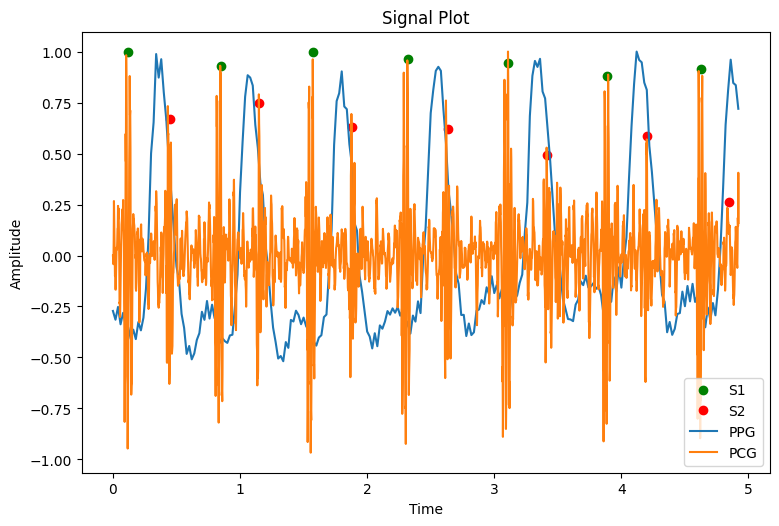

In [1199]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

#display for result using tkinter
def plot_signals():
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(tsnew1, [normalize_rekon2[int(i)] for i in max_points_s1], 'go', label='S1')
    ax.plot(tsnew2, [normalize_rekon2[int(i)] for i in max_points_s2], 'ro', label='S2')
    ax.plot(time_ppg, signalppg2_normalized, label='PPG')
    ax.plot(time_normalizea2, normalize_a2rekon, label='PCG')
    
    ax.legend()
    ax.set_title("Signal Plot")
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")
    
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

def display_data():
    for key, value in data.items():
        tree.insert("", "end", values=(key, value))

def display_predictions():
    prediction_label.config(text="Predictions: " + ", ".join(predicted_labels))

window = tk.Tk()
window.title("Signal Analysis")

frame_plot = ttk.Frame(window)
frame_plot.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

plot_button = ttk.Button(window, text="Plot Signals", command=plot_signals)
plot_button.pack(side=tk.TOP, fill=tk.X)

frame_data = ttk.Frame(window)
frame_data.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

tree = ttk.Treeview(frame_data, columns=("Metric", "Value"), show='headings')
tree.heading("Metric", text="Metric")
tree.heading("Value", text="Value")
tree.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

data_button = ttk.Button(window, text="Show Data", command=display_data)
data_button.pack(side=tk.LEFT, fill=tk.X)

frame_prediction = ttk.Frame(window)
frame_prediction.pack(side=tk.BOTTOM, fill=tk.X)

prediction_label = ttk.Label(frame_prediction, text="Predictions: ")
prediction_label.pack(side=tk.TOP, fill=tk.X)

prediction_button = ttk.Button(frame_prediction, text="Show Predictions", command=display_predictions)
prediction_button.pack(side=tk.TOP, fill=tk.X)

window.mainloop()

In [ ]:
'''finish'''